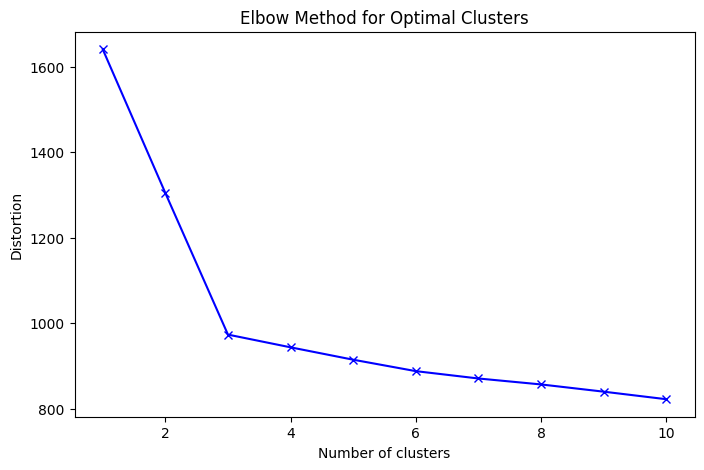

              age  quiz_score_1  quiz_score_2  quiz_score_3  \
cluster                                                       
0        0.490855      0.504649      0.486294      0.491607   
1        0.494318      0.501467      0.509503      0.489732   
2        0.501329      0.468910      0.492362      0.519931   

         assignment_score_1  assignment_score_2  math_engagement_time  \
cluster                                                                 
0                  0.518476            0.514129              0.500299   
1                  0.533099            0.477423              0.491686   
2                  0.503043            0.495763              0.491711   

         science_engagement_time  history_engagement_time  login_frequency  \
cluster                                                                      
0                       0.500869                 0.496824         0.508506   
1                       0.484776                 0.493033         0.474609   
2     

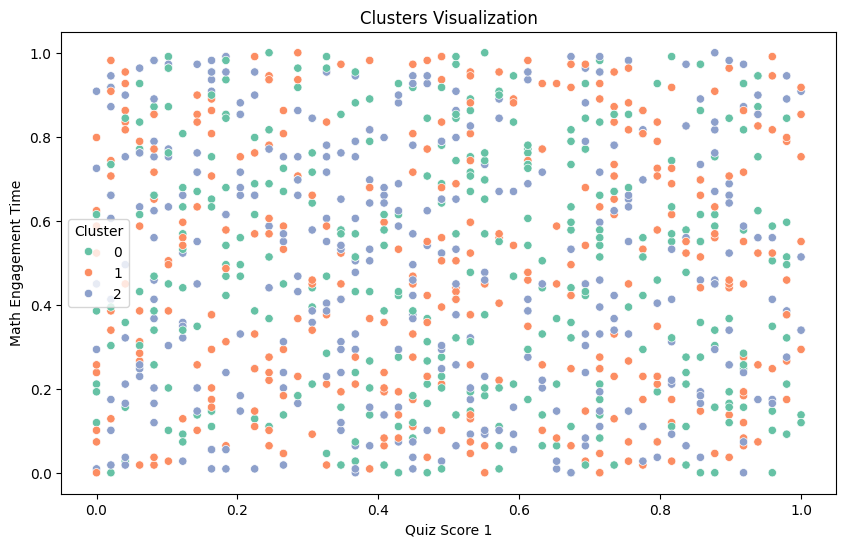

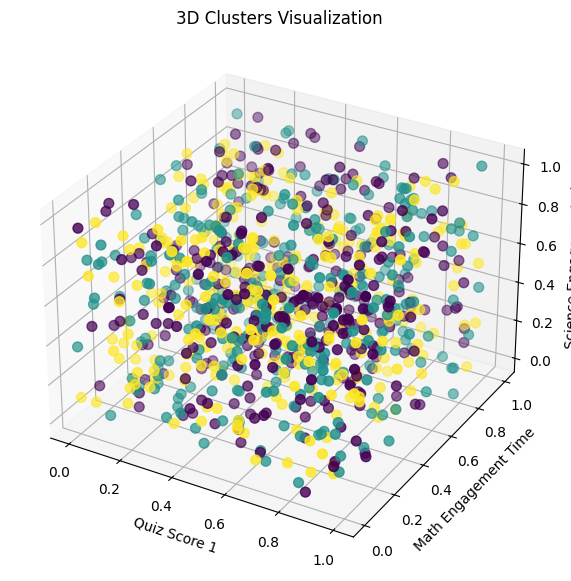

         student_id       age  quiz_score_1  quiz_score_2  quiz_score_3  \
cluster                                                                   
0        447.233728  0.490855      0.504649      0.486294      0.491607   
1        533.937500  0.494318      0.501467      0.509503      0.489732   
2        521.856725  0.501329      0.468910      0.492362      0.519931   

         assignment_score_1  assignment_score_2  math_engagement_time  \
cluster                                                                 
0                  0.518476            0.514129              0.500299   
1                  0.533099            0.477423              0.491686   
2                  0.503043            0.495763              0.491711   

         science_engagement_time  history_engagement_time  login_frequency  \
cluster                                                                      
0                       0.500869                 0.496824         0.508506   
1                       

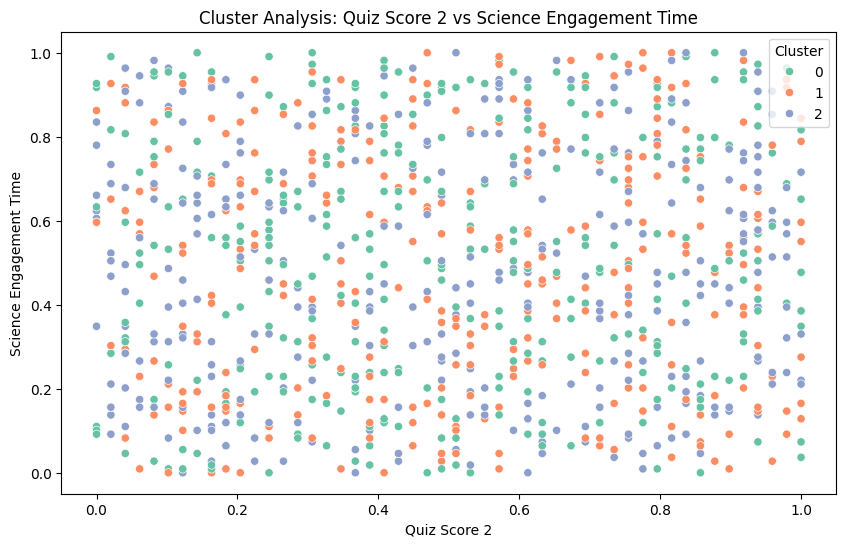

   student_id  cluster      recommendation
0           1        0  Advanced Resources
1           2        1  Balanced Materials
2           3        2    Remedial Support
3           4        0  Advanced Resources
4           5        0  Advanced Resources
         student_id       age  quiz_score_1  quiz_score_2  quiz_score_3  \
cluster                                                                   
0        447.233728  0.490855      0.504649      0.486294      0.491607   
1        533.937500  0.494318      0.501467      0.509503      0.489732   
2        521.856725  0.501329      0.468910      0.492362      0.519931   

         assignment_score_1  assignment_score_2  math_engagement_time  \
cluster                                                                 
0                  0.518476            0.514129              0.500299   
1                  0.533099            0.477423              0.491686   
2                  0.503043            0.495763              0.491711   



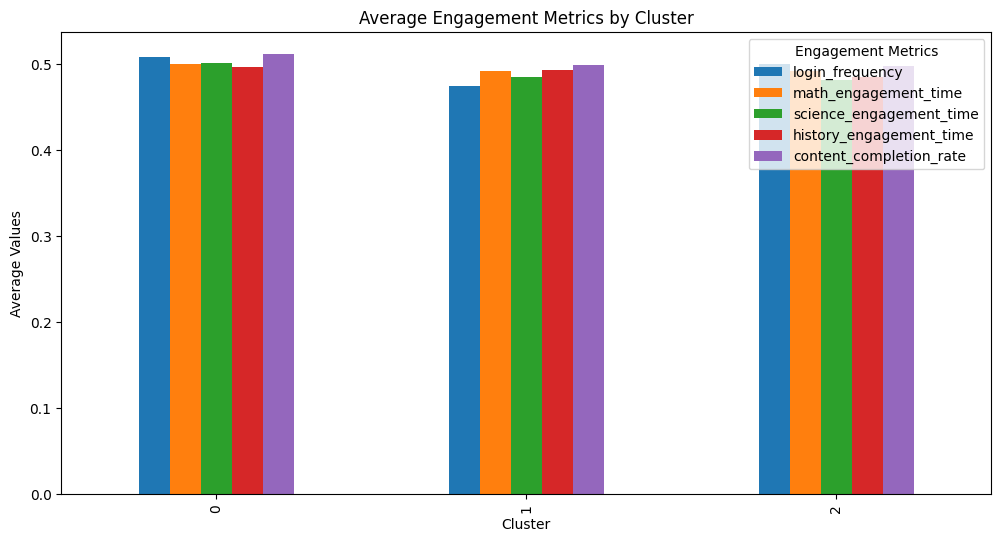

Low Engagement Students:
    student_id  content_completion_rate  login_frequency
0            1                 0.224490            0.500
1            2                 0.326531            0.250
5            6                 0.000000            0.625
8            9                 0.510204            1.000
13          14                 0.469388            0.875
   student_id engagement_flag  \
0           1             Low   
1           2             Low   
2           3            High   
3           4            High   
4           5            High   

                            engagement_intervention  
0       Provide Gamified Activities, Send Reminders  
1       Provide Gamified Activities, Send Reminders  
2  Assign Optional Challenges, Enrichment Materials  
3  Assign Optional Challenges, Enrichment Materials  
4  Assign Optional Challenges, Enrichment Materials  


C:\Users\dell\AppData\Local\Temp\ipykernel_21972\1535791915.py:319: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flag_counts.index, y=flag_counts.values, hue=None, palette="coolwarm")


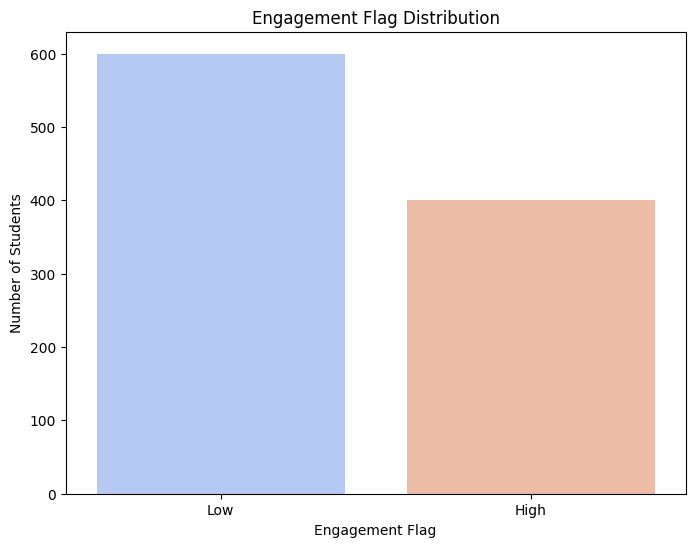

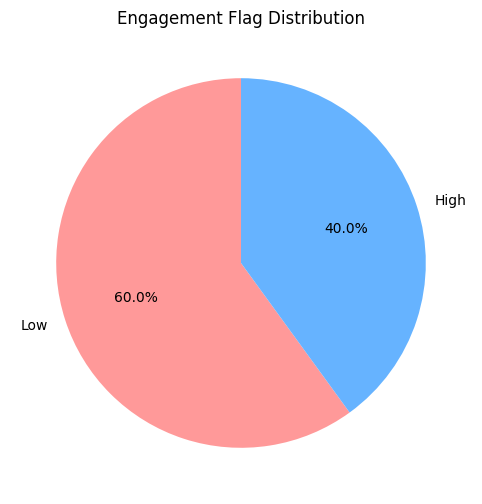

engagement_flag
Low    1000
Name: count, dtype: int64


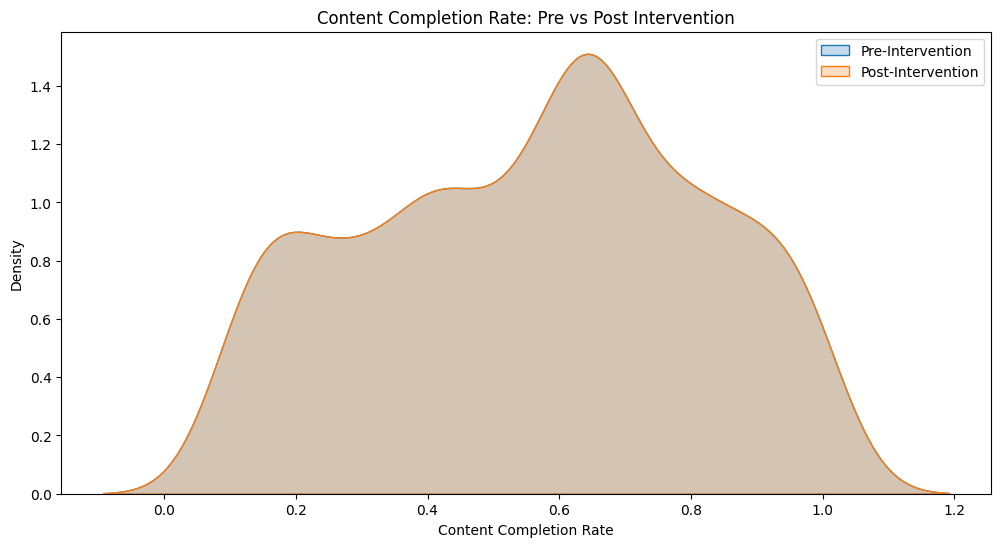

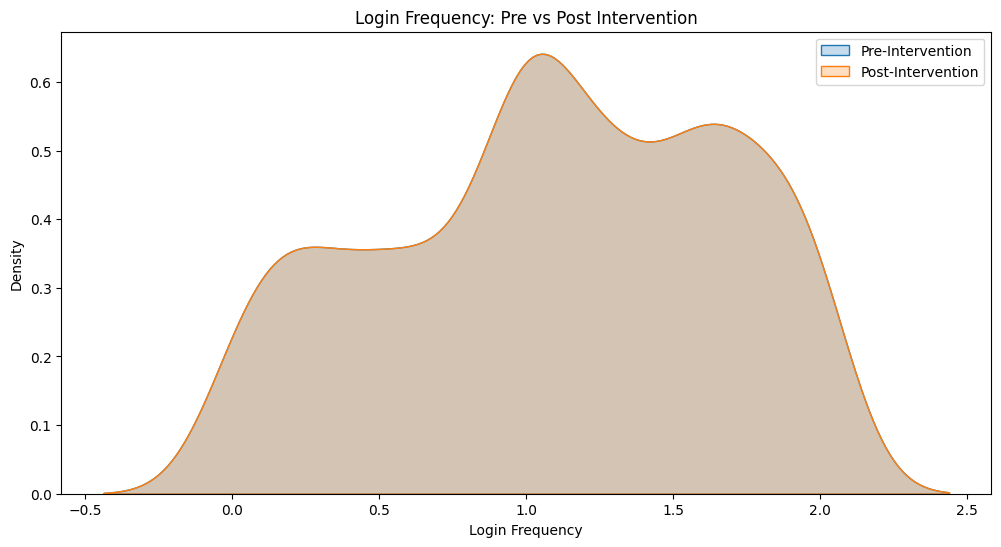

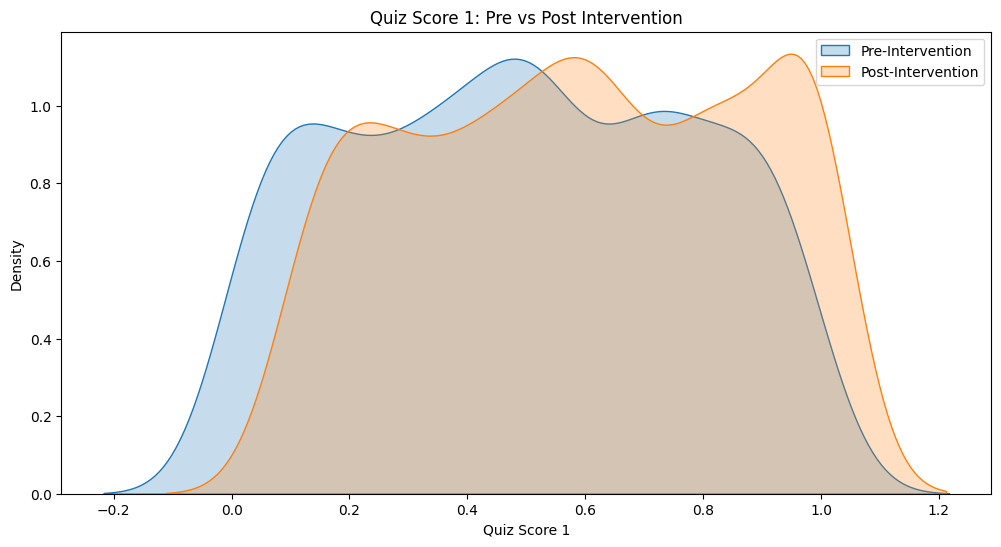

In [1]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker and set the number of students
fake = Faker()
num_students = 1000

# Generating enhanced synthetic student data
data = {
    "student_id": range(1, num_students + 1),
    "name": [fake.name() for _ in range(num_students)],
    "age": np.random.randint(18, 30, num_students),
    
    # Multiple quiz scores
    "quiz_score_1": np.random.randint(50, 100, num_students),
    "quiz_score_2": np.random.randint(50, 100, num_students),
    "quiz_score_3": np.random.randint(50, 100, num_students),
    
    # Assignment scores
    "assignment_score_1": np.random.randint(50, 100, num_students),
    "assignment_score_2": np.random.randint(50, 100, num_students),
    
    # Topic-specific engagement times (in minutes)
    "math_engagement_time": np.random.randint(10, 120, num_students),
    "science_engagement_time": np.random.randint(10, 120, num_students),
    "history_engagement_time": np.random.randint(10, 120, num_students),
    
    # Frequency of logins (per week)
    "login_frequency": np.random.randint(1, 10, num_students),
    
    # Content completion rate (percentage)
    "content_completion_rate": np.random.randint(50, 100, num_students),
    
    # Learning style
    "learning_style": np.random.choice(["visual", "auditory", "kinesthetic"], num_students)
}

# Creating the DataFrame and saving it as a CSV file
df = pd.DataFrame(data)
df.to_csv("enhanced_synthetic_student_data.csv", index=False)

# Display the first few rows to check the data
# Display the first few rows to check the data
df.head()

# Check for missing values in the DataFrame
df.isnull().sum()
from sklearn.preprocessing import MinMaxScaler

# Normalize selected columns
scaler = MinMaxScaler()
numeric_columns = [
    "age", "quiz_score_1", "quiz_score_2", "quiz_score_3",
    "assignment_score_1", "assignment_score_2",
    "math_engagement_time", "science_engagement_time", "history_engagement_time",
    "login_frequency", "content_completion_rate"
]

# Apply scaling to the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows to confirm the normalization
# One-hot encode the learning style column
df = pd.get_dummies(df, columns=["learning_style"])

# Display the first few rows to confirm the one-hot encoding
df.head()
# Drop non-numeric columns (like 'name') from the DataFrame
numeric_df = df.drop(columns=["student_id", "name"])
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_df)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
numeric_df['cluster'] = kmeans.fit_predict(numeric_df)

# Display the first few rows with cluster assignments
numeric_df.head()
df['cluster'] = numeric_df['cluster']
df.head()

# Analyze clusters
cluster_analysis = numeric_df.groupby('cluster').mean()
print(cluster_analysis)
# Save the clustered data to a new CSV file
df.to_csv("clustered_student_data.csv", index=False)
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of clusters based on two key features (e.g., quiz_score_1 and engagement_time)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="quiz_score_1", y="math_engagement_time", hue="cluster", palette="Set2")
plt.title("Clusters Visualization")
plt.xlabel("Quiz Score 1")
plt.ylabel("Math Engagement Time")
plt.legend(title="Cluster")
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['quiz_score_1'], df['math_engagement_time'], df['science_engagement_time'], c=df['cluster'], cmap='viridis', s=50)
ax.set_xlabel('Quiz Score 1')
ax.set_ylabel('Math Engagement Time')
ax.set_zlabel('Science Engagement Time')
plt.title("3D Clusters Visualization")
plt.show()

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])  # Excludes non-numeric columns like 'name'

# Perform the group-by operation with numeric columns
cluster_summary = numeric_columns.groupby(df['cluster']).mean()  # Use 'cluster' as the grouping column
print(cluster_summary)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="quiz_score_2", y="science_engagement_time", hue="cluster", palette="Set2")
plt.title("Cluster Analysis: Quiz Score 2 vs Science Engagement Time")
plt.xlabel("Quiz Score 2")
plt.ylabel("Science Engagement Time")
plt.legend(title="Cluster")
plt.show()


# Assign recommendations based on clusters
def recommend(cluster):
    if cluster == 0:
        return "Advanced Resources"
    elif cluster == 1:
        return "Balanced Materials"
    elif cluster == 2:
        return "Remedial Support"
    else:
        return "No Recommendation"

df['recommendation'] = df['cluster'].apply(recommend)
print(df[['student_id', 'cluster', 'recommendation']].head())
# Define a function to label clusters based on their characteristics
def interpret_cluster(row):
    if row['quiz_score_1'] > 80 and row['math_engagement_time'] > 100:
        return "High Performers"
    elif row['quiz_score_1'] > 60:
        return "Average Performers"
    else:
        return "Needs Improvement"

# Apply the interpretation function to each row in the cluster summary
cluster_summary['label'] = cluster_summary.apply(interpret_cluster, axis=1)
print(cluster_summary)
# Define a mapping of cluster to recommendation
recommendations = {
    0: "Advanced Resources",  # High Performers
    1: "Balanced Materials",  # Average Performers
    2: "Remedial Support"     # Needs Improvement
}

# Map recommendations to the original DataFrame
df['recommendation'] = df['cluster'].map(recommendations)
print(df[['student_id', 'cluster', 'recommendation']].head())
# Save the DataFrame with recommendations
df.to_csv("clustered_student_data_with_recommendations.csv", index=False)

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(numeric_df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
cluster_summary = numeric_df.groupby('cluster').mean()
print(cluster_summary)
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(numeric_df)
    silhouette_avg = silhouette_score(numeric_df, labels)
    print(f"Clusters: {k}, Silhouette Score: {silhouette_avg}")
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_df)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reduced_data)
silhouette_avg = silhouette_score(reduced_data, kmeans.labels_)
print(f"Silhouette Score with PCA: {silhouette_avg}")

recommendations = {
    0: "Advanced Resources",
    1: "Balanced Materials",
    2: "Remedial Support"
}

numeric_df['recommendation'] = numeric_df['cluster'].map(recommendations)
print(numeric_df[['cluster', 'recommendation']])
numeric_df.to_csv("final_clustered_data.csv", index=False)


# Mapping clusters to general recommendations
cluster_recommendations = {
    0: "Advanced Materials",
    1: "Balanced Resources",
    2: "Remedial Support"
}

# Mapping learning styles to specific resources
learning_style_recommendations = {
    "visual": "Video Lectures, Infographics",
    "auditory": "Podcasts, Narrated Slides",
    "kinesthetic": "Interactive Simulations, Exercises"
}

# Example: Adding a 'learning_style' column if missing
df['learning_style'] = np.random.choice(['visual', 'auditory', 'kinesthetic'], size=len(df))


# Function for personalized recommendations
def get_personalized_recommendation(cluster, learning_style):
    cluster_recommendations = {
        0: "Advanced Materials",
        1: "Balanced Resources",
        2: "Remedial Support"
    }
    learning_style_recommendations = {
        "visual": "Video Lectures, Infographics",
        "auditory": "Podcasts, Narrated Slides",
        "kinesthetic": "Interactive Simulations, Exercises"
    }
    general_recommendation = cluster_recommendations.get(cluster, "General Resources")
    style_specific_recommendation = learning_style_recommendations.get(learning_style, "General Materials")
    return f"{general_recommendation} with {style_specific_recommendation}"

# Apply the function to generate personalized recommendations
df['personalized_recommendation'] = df.apply(
    lambda row: get_personalized_recommendation(row['cluster'], row['learning_style']),
    axis=1
)

# View the updated DataFrame
print(df[['student_id', 'cluster', 'learning_style', 'personalized_recommendation']])

# Check the distribution of recommendations
print(df['personalized_recommendation'].value_counts())

# Validate a few rows
print(df[df['cluster'] == 0].head())  # Validate recommendations for Cluster 0
print(df[df['learning_style'] == 'visual'].head())  # Validate for visual learners

# Save the DataFrame to a CSV file
df.to_csv("personalized_recommendations.csv", index=False)
# Analyze distribution by cluster
print(df.groupby('cluster')['personalized_recommendation'].value_counts())

# Analyze distribution by learning style
print(df.groupby('learning_style')['personalized_recommendation'].value_counts())


#second objective
# Analyze engagement data across clusters
engagement_metrics = ['login_frequency', 'math_engagement_time', 
                      'science_engagement_time', 'history_engagement_time', 
                      'content_completion_rate']

engagement_analysis = df.groupby('cluster')[engagement_metrics].mean()
print("Engagement Analysis by Cluster:")
print(engagement_analysis)

# Plot engagement levels by cluster
import matplotlib.pyplot as plt
engagement_analysis.plot(kind='bar', figsize=(12, 6))
plt.title("Average Engagement Metrics by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Values")
plt.legend(title="Engagement Metrics")
plt.show()

# Define low-engagement conditions
low_engagement_conditions = (df['content_completion_rate'] < 0.6) & (df['login_frequency'] < 3)
df['engagement_flag'] = low_engagement_conditions.apply(lambda x: "Low" if x else "High")

# View flagged students
low_engagement_students = df[df['engagement_flag'] == "Low"]
print("Low Engagement Students:")
print(low_engagement_students[['student_id', 'content_completion_rate', 'login_frequency']].head())

# Add tailored engagement recommendations
def engagement_intervention(flag):
    if flag == "Low":
        return "Provide Gamified Activities, Send Reminders"
    else:
        return "Assign Optional Challenges, Enrichment Materials"

df['engagement_intervention'] = df['engagement_flag'].apply(engagement_intervention)

# View engagement recommendations
print(df[['student_id', 'engagement_flag', 'engagement_intervention']].head())
# Plot the distribution of engagement flags
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of engagement flag distribution
flag_counts = df['engagement_flag'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=flag_counts.index, y=flag_counts.values, hue=None, palette="coolwarm")
plt.title("Engagement Flag Distribution")
plt.xlabel("Engagement Flag")
plt.ylabel("Number of Students")
plt.show()

# Optional: Pie chart
plt.figure(figsize=(8, 6))
flag_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Engagement Flag Distribution")
plt.ylabel("")  # Removes y-label
plt.show()
# Simulate improvements for low-engagement students
df.loc[df['engagement_flag'] == 'Low', 'content_completion_rate'] += 0.1  # Boost completion rate by 10%
df.loc[df['engagement_flag'] == 'Low', 'login_frequency'] += 1  # Increase login frequency by 1

# Ensure the values don't exceed logical limits
df['content_completion_rate'] = df['content_completion_rate'].clip(upper=1.0)
df['login_frequency'] = df['login_frequency'].clip(upper=10)

# Recalculate engagement flags based on updated metrics
def recalculate_engagement_flag(row):
    if row['content_completion_rate'] >= 0.6 and row['login_frequency'] >= 3:
        return "High"
    else:
        return "Low"

df['engagement_flag'] = df.apply(recalculate_engagement_flag, axis=1)

# Analyze updated engagement flag distribution
print(df['engagement_flag'].value_counts())

# Pre-Intervention Distribution
pre_intervention = df.copy()  # Store the original state

# Simulate Post-Intervention Metrics
post_intervention = df.copy()

# Plot comparison of content completion rates
plt.figure(figsize=(12, 6))
sns.kdeplot(pre_intervention['content_completion_rate'], label='Pre-Intervention', fill=True)
sns.kdeplot(post_intervention['content_completion_rate'], label='Post-Intervention', fill=True)
plt.title("Content Completion Rate: Pre vs Post Intervention")
plt.xlabel("Content Completion Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

# Compare Login Frequency
plt.figure(figsize=(12, 6))
sns.kdeplot(pre_intervention['login_frequency'], label='Pre-Intervention', fill=True)
sns.kdeplot(post_intervention['login_frequency'], label='Post-Intervention',fill=True)
plt.title("Login Frequency: Pre vs Post Intervention")
plt.xlabel("Login Frequency")
plt.ylabel("Density")
plt.legend()
plt.show()

# Simulate quiz score improvements for low-engagement students
df.loc[df['engagement_flag'] == 'Low', 'quiz_score_1'] += 0.1  # Boost by 10%
df['quiz_score_1'] = df['quiz_score_1'].clip(upper=1.0)  # Ensure max is 1.0

# Compare Pre vs Post Quiz Scores
plt.figure(figsize=(12, 6))
sns.kdeplot(pre_intervention['quiz_score_1'], label='Pre-Intervention', fill=True)
sns.kdeplot(df['quiz_score_1'], label='Post-Intervention', fill=True)
plt.title("Quiz Score 1: Pre vs Post Intervention")
plt.xlabel("Quiz Score 1")
plt.ylabel("Density")
plt.legend()
plt.show()

